# Learning Outcomes

1. load, display and save images
2. load, show and save videos
3. Image resizing

## Why OpenCV
- Large community support, i.e. you can find a lot of resources online.
- Compatible woth several OS, MacOS, windows and Linux. Can be written in c++, Python and Java languages.
- Interoperable with Numpy module, thereby fast computation and mathematical operations on image array.

# Setup

In [1]:
import sys
# Minimum Python 3.7
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv

## Image formats
- TIF (.tif)
    * good for printing, great delth level, large file size
- bmp (.bmp)
    * large file size
- gif (.gif) (OpenCV cannot handle)
    * animation, shallow color depth
- jpeg (.jpeg .jpg)
    * photo
- PNG (.png)
    * website
- webp (.webp)
    * website, smaller file size compare to png and jpeg, not supported by all the browser

In [2]:
img = cv.imread("images/lena.jfif")
img_grayscale = cv.imread("images/lena.jfif", 0)
# 0 is for grayscale, -1: cv.IMREAD_UNCHANGE, 1 (default)

cv.imshow("lena_color", img)
cv.imshow("lena_grayscale", img_grayscale)
cv.waitKey(0)     # keyboard binding function, wait for user's responce
cv.destroyAllWindows()

In [3]:
def show_img(window_name, img):
    """Arguements: window_name and img"""
    cv.imshow(window_name, img)
    cv.waitKey(0)     # keyboard binding function, wait for user's responce
    cv.destroyAllWindows()

In [4]:
img = cv.imread("images/lena.png")

show_img("lena", img)

In [5]:
# show difference between jpg and png image

img_jpeg = cv.imread("images/lena.jfif", -1)
img_png = cv.imread("images/lena.png", -1)

print(f"The shape of jpg image: {img_jpeg.shape}")
print(f"The shape of png image: {img_png.shape}")

The shape of jpg image: (225, 225, 3)
The shape of png image: (225, 225, 4)


In [6]:
!pip install imageio


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import imageio

GIF = imageio.mimread("images/rotating_earth_large.gif")
# convert RGB to BGR cus cv.show is BGR
imgs = [cv.cvtColor(img, cv.COLOR_RGB2BGR) for img in GIF]

# show_img("gif", imgs[0])

for img in imgs:
    cv.imshow("GIF", img)
    cv.waitKey(150)     # wait 150ms for user input

cv.destroyAllWindows()

### save images
```
cv.imwrite(filename, img)
```

In [8]:
# a good way to load, display and saves images
img = cv.imread(cv.samples.findFile("images/lena.jfif"))

if img is None:
    sys.exit("No such filepath!")
    
cv.imshow("img", img)
k = cv.waitKey(0) & 0xFF    # don't care the numLock is on or off
if k == ord('s'):
    cv.imwrite("lena_save.jpg", img)
    
cv.destroyAllWindows()

## basic operation on videos
Video is basically sequences of images.

### Load and display video with OpenCV

In [9]:
# Initiate and ibject

cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened():
    sys.exit("The video filepath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
        
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cap.release()
cv.destroyAllWindows()

In [10]:
# use webcam get the video and save it on local disk
cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam is detected")

# filename, fourcc, fps, frame size
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")   # algorithm to compress and decompress videos
fps = 15   # any number that you want
w, h = int(cap.get(3)), int(cap.get(4))
out = cv.VideoWriter("videos/out.avi", fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received!")
        break
    out.write(frame)    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

In [11]:
cap = cv.VideoCapture(0)
print(f"FPS of webcam: {cap.get(5)}")

FPS of webcam: 30.0


In [12]:
import time

In [13]:
# Initiate an object
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened:
    sys.exit("The video fielpath is not correct")

cv.namedWindow("frame", cv.WINDOW_NORMAL)
start = time.time()
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
    
    cv.imshow("frame", frame)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
end = time.time()    
#cap.release()
cv.destroyAllWindows()

In [14]:
print(f"The fps: {cap.get(5)}")
n_frames = cap.get(7)
print(f"The estimated fps using OpenCV: {n_frames / (end-start)}")

The fps: 60.0
The estimated fps using OpenCV: 2637.75355754133


# Image resizing

There are two ways to do image resizing:
1. specify the desired image width and height
2. scale factor(maintain the aspect ratio (w/h))

```
cv.resize(img, (x_new, y_new), fx, fy, interpolation)
```

The default interpolation is bilinear interpolation

In [15]:
img = cv.imread("images/soccer.jpg")

new_height = 450
new_width = 300

img_resize = cv.resize(img, (new_width, new_height))

cv.imshow("original", img)
show_img("resize", img_resize)

In [16]:
img.shape

(1200, 800, 3)

In [17]:
# 2nd method: scale factor
img = cv.imread("images/lena.jfif")

img_resize = cv.resize(img, None, fx=1.5, fy=1.5)

cv.imshow("original", img)
show_img("resize", img_resize)

# Exercise

1. Load and display the image 'dog.jfif'. Save the image in png format.

In [18]:
img = cv.imread(cv.samples.findFile("images/dog.jfif"))

cv.imshow("images", img)
k = cv.waitKey(0) & 0xFF
if k== 115:
    cv.imwrite("images/dog_save.png", img)
cv.destroyAllWindows()

2. Suggest 2 ways and write codes to display 2 images simultaneously. You can use any image snapped fromyour handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [19]:
img = cv.imread("images/dog.jfif")
img_grayscale = cv.imread("images/dog.jfif", 0)
# 0 is for grayscale, -1: cv.IMREAD_UNCHANGE, 1 (default)

cv.imshow("dog_color", img)
cv.imshow("dog_grayscale", img_grayscale)

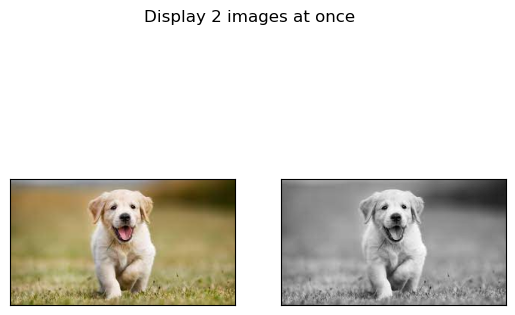

In [21]:
#2nd way: matplotlib
import matplotlib.pyplot as plt

img_rgb = cv.cvtColor(img, cv.COLOR_RGB2BGR)

plt.subplot(121)
plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_grayscale, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.suptitle("Display 2 images at once")
plt.show()

In [23]:
# convert the grayscale to bgr
img_gray_bgr = cv.cvtColor(img_grayscale, cv.COLOR_GRAY2BGR)

img_combined = np.hstack([img, img_gray_bgr])

show_img("img_combined", img_combined)

3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). 
    * You can specify an arbitrary frame rate.Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [24]:
cap = cv.VideoCapture("videos/img_pexels.mp4")

if not cap.isOpened:
    sys.exit("The video fielpath is not correct")
    
# filename, fourcc, fps, frame size
fourcc = cv.VideoWriter_fourcc(*'MP4V')
fps = int(cap.get(5))
w, h = int(cap.get(3)), int(cap.get(4))
smaller_w, smaller_h = int(w/2), int(h/3)
out = cv.VideoWriter("videos/smaller_img_pexels.mp4", fourcc, fps, (smaller_w, smaller_h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("No frame received")
        break
        
    smaller_frame = cv.resize(frame, (smaller_w, smaller_h))
    cv.imshow("smaller frame", smaller_frame)
    out.write(smaller_frame)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
cap.release()
out.release()
cv.destroyAllWindows()

4. Enlarge the image "dog.jfif" by using different techniques: 
1) Linear interpolation, 
2) Cubic interpolation and
3) nearest neighbor interpolation. Comment on the upscaled of all the outputs.

(([], []), ([], []))

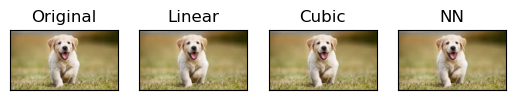

In [25]:
img = cv.imread("images/dog.jfif")

# linear interpolation
img_enlarge_linear = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_LINEAR)

# cubic interpolation
img_enlarge_cubic = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_CUBIC)

# nearest neighbour interpolation
img_enlarge_nn = cv.resize(img, None, fx = 1.5, fy = 1.5, interpolation = cv.INTER_NEAREST)

img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
img_enlarge_linear = cv.cvtColor(img_enlarge_linear, cv.COLOR_RGB2BGR)
img_enlarge_cubic = cv.cvtColor(img_enlarge_cubic, cv.COLOR_RGB2BGR)
img_enlarge_nn = cv.cvtColor(img_enlarge_nn, cv.COLOR_RGB2BGR)

plt.subplot(141), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(img_enlarge_linear), plt.title("Linear")
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(img_enlarge_cubic), plt.title("Cubic")
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(img_enlarge_nn), plt.title("NN")
plt.xticks([]), plt.yticks([])